# AG's news - Exploratory Data Analysis

<p><b>AG’s news corpus.</b> We obtained the AG’s corpus of news article on the web2
. It contains 496,835
categorized news articles from more than 2000 news sources. We choose the 4 largest classes from
this corpus to construct our dataset, using only the title and description fields. The number of training
samples for each class is 30,000 and testing 1900.</p>

https://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

sns.set()

## Input data

In [9]:
mapping_labels = {
    1: 'World',
    2: 'Sports',
    3: 'Business',
    4: 'Sci/Tech'
}

In [10]:
def get_data():
    train = pd.read_csv(
        'https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv',
        names=['category', 'title', 'description']
    )
    train['text'] = train['title'] + '\n' + train['description']
    train['label'] = train['category'].apply(lambda x: mapping_labels[x])

    test = pd.read_csv(
        'https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv',
        names=['category', 'title', 'description']
    )
    test['text'] = test['title'] + '\n' + test['description']
    test['label'] = test['category'].apply(lambda x: mapping_labels[x])

    return train[['text']], train['label'], test[['text']], test['label']

In [11]:
x_train, y_train, x_test, y_test = get_data()

## Explore data

In [12]:
print(f'Train shape: {x_train.shape[0]}')
print(f'Test  shape: {x_test.shape[0]}')

Train shape: 120000
Test  shape: 7600


In [13]:
x_train.head()

,text
0,Wall St. Bears Claw Back Into the Black (Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Iraq Halts Oil Exports from Main Southern Pipe...
4,"Oil prices soar to all-time record, posing new..."


In [14]:
y_train.head()

0    Business
1    Business
2    Business
3    Business
4    Business
Name: label, dtype: object

In [15]:
y_train.nunique()

4

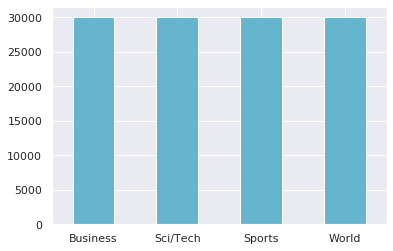

In [18]:
y_train.value_counts().sort_index().plot(kind='bar', color='c');
plt.xticks(rotation='horizontal');

In [17]:
y_test.nunique()

4

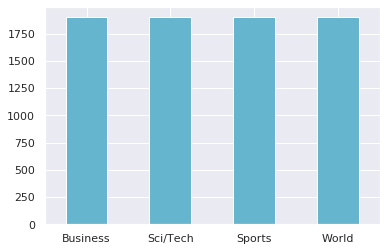

In [19]:
y_test.value_counts().sort_index().plot(kind='bar', color='c');
plt.xticks(rotation='horizontal');

Os rótulos estão balanceados.

### Analisando a quantidade de caracteres das sentenças:

In [20]:
x_train['len'] = x_train['text'].apply(len)
x_test['len'] = x_test['text'].apply(len)

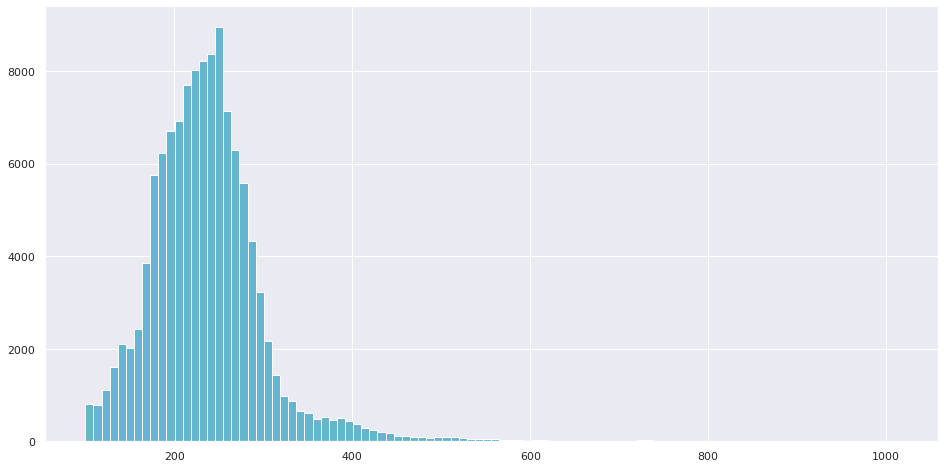

In [25]:
x_train['len'].hist(bins=100, figsize=(16, 8), color='c');

In [26]:
(x_train['len'] > 600).sum()

305

In [27]:
(x_train['len'] > 800).sum()

68

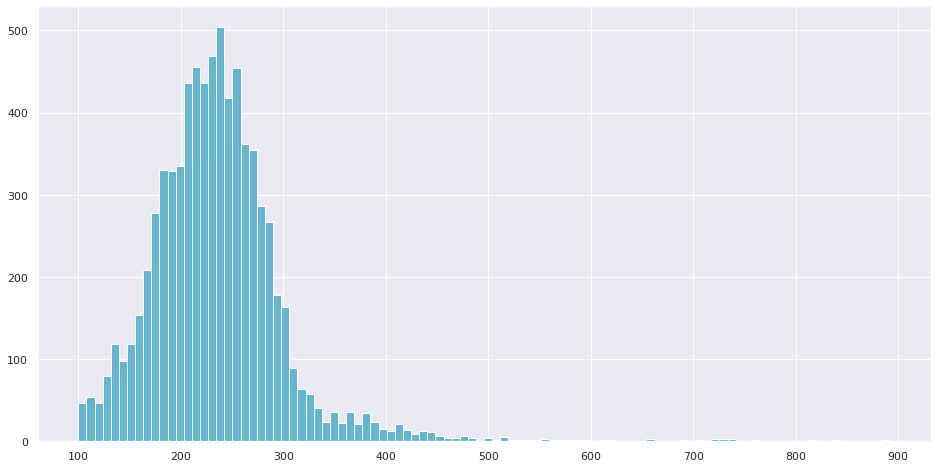

In [28]:
x_test['len'].hist(bins=100, figsize=(16, 8), color='c');

In [29]:
(x_test['len'] > 600).sum()

22

A distribuição da quantidade de caracteres das setenças é inclinada a esquerda, tendo a maior parte do texto até 500 caracteres, porém há a presença de sentenças maiores acima de 600 caracteres.

### Analisando a quantidade de palavras:

In [30]:
x_train['len'] = x_train['text'].apply(lambda x: len(x.split()))
x_test['len'] = x_test['text'].apply(lambda x: len(x.split()))

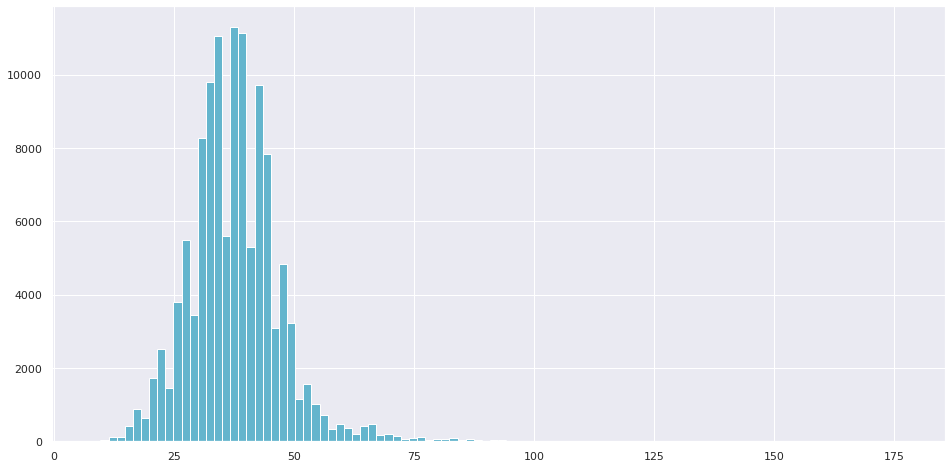

In [31]:
x_train['len'].hist(bins=100, figsize=(16, 8), color='c');

In [33]:
(x_train['len'] > 100).sum()

191

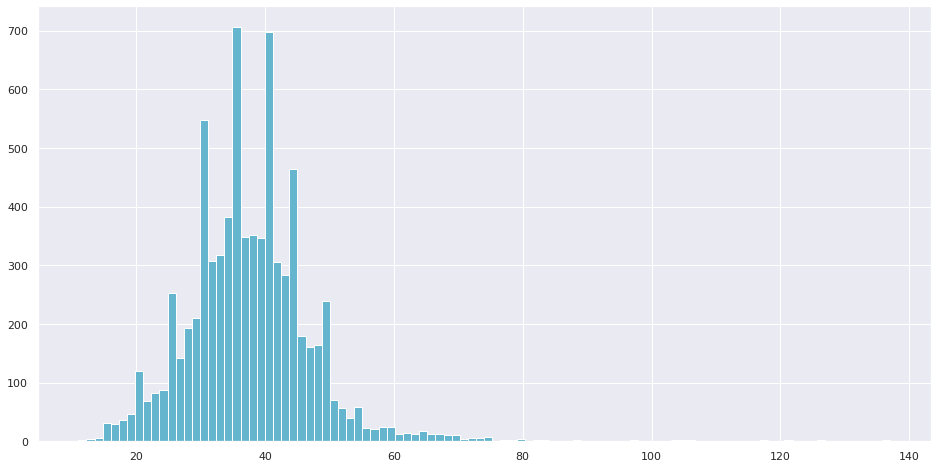

In [34]:
x_test['len'].hist(bins=100, figsize=(16, 8), color='c');

### Analisando a quantidade de palavras únicas:

In [35]:
x_train['len'] = x_train['text'].apply(lambda x: len(set(x.split())))
x_test['len'] = x_test['text'].apply(lambda x: len(set(x.split())))

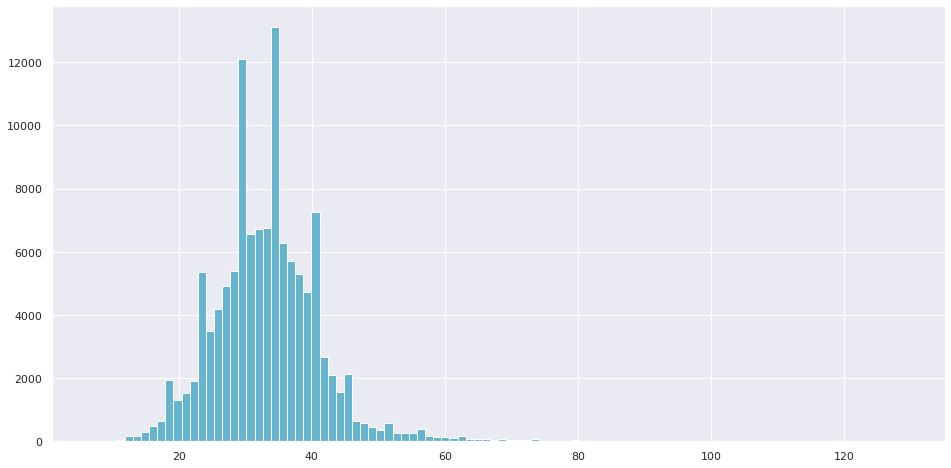

In [36]:
x_train['len'].hist(bins=100, figsize=(16, 8), color='c');

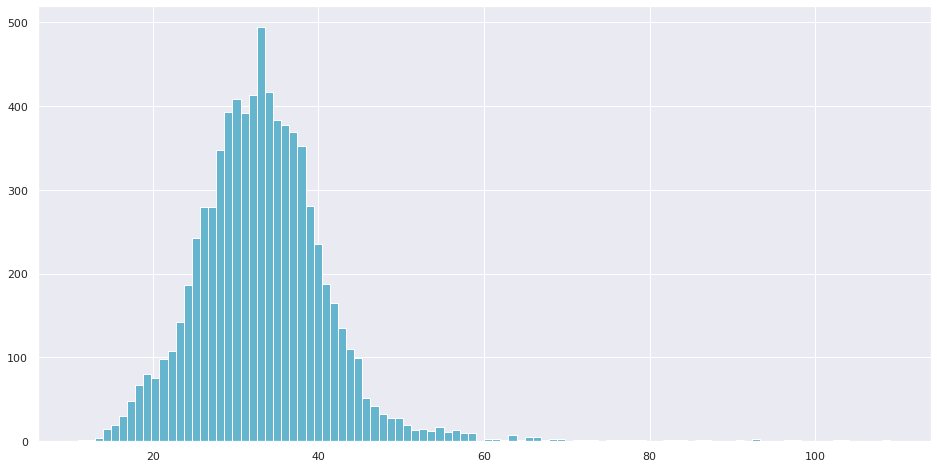

In [37]:
x_test['len'].hist(bins=100, figsize=(16, 8), color='c');

## Plotando as nuvens de palavras:

In [38]:
from wordcloud import WordCloud

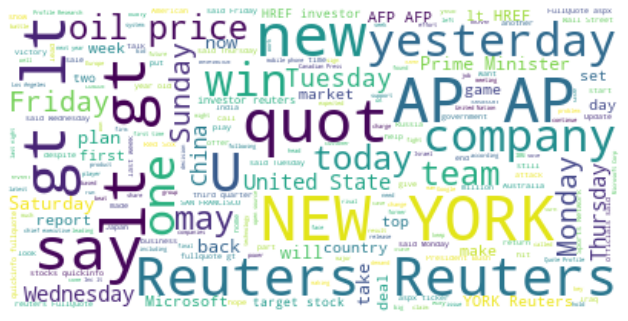

In [39]:
wordcloud = WordCloud(max_font_size=40, max_words=2000, relative_scaling=0, 
                      repeat=False, background_color="white")
wordcloud_geral = wordcloud.generate(' '.join(x_train['text']))

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

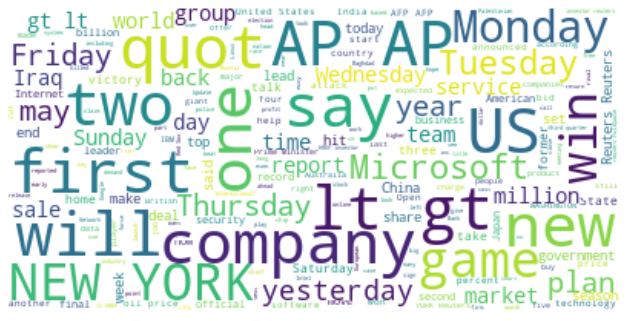

In [40]:
wordcloud = WordCloud(max_font_size=40, max_words=2000, relative_scaling=0, 
                      repeat=False, background_color="white")
wordcloud_geral = wordcloud.generate(' '.join(x_test['text']))

plt.figure(figsize=(11, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Modeling

In [41]:
vectorizer = TfidfVectorizer().fit(x_train['text'])

x_train = vectorizer.transform(x_train['text'])
x_test = vectorizer.transform(x_test['text'])

In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.9023684210526316
precision: 0.9026365705611129
recall:    0.9023684210526316
f1_score:  0.9023975334525629


In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.7735526315789474
precision: 0.7732678859114169
recall:    0.7735526315789474
f1_score:  0.7733873598452893


In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.8893421052631579
precision: 0.8891575413513068
recall:    0.8893421052631579
f1_score:  0.8888393137497685


In [45]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.6861842105263158
precision: 0.6941017850084538
recall:    0.6861842105263158
f1_score:  0.6860719557502291


In [46]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.9107894736842105
precision: 0.9105682143039612
recall:    0.9107894736842105
f1_score:  0.91065963236292


In [47]:
from sklearn.svm import SVC

model = SVC().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'accuracy:  {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'recall:    {recall_score(y_test, y_pred, average="weighted")}')
print(f'f1_score:  {f1_score(y_test, y_pred, average="weighted")}')

accuracy:  0.9257894736842105
precision: 0.9258567219346155
recall:    0.9257894736842105
f1_score:  0.9256453538216081


## Feature importance

In [48]:
mapping_features = {}
for i, feat in enumerate(vectorizer.get_feature_names()):
    mapping_features[i] = feat

In [49]:
x_train.shape[1]

65006

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(x_train, y_train)

In [51]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print(f"{f + 1}. {mapping_features[indices[f]]} ({importances[indices[f]]})")
    if importances[indices[f]] == 0.0:
        break

Feature ranking:
1. iraq (0.007310603246955122)
2. his (0.0063635739799548455)
3. microsoft (0.0062800842953534605)
4. season (0.006086813895802878)
5. its (0.0056726718248121255)
6. the (0.005581024122967067)
7. president (0.005453581475341345)
8. company (0.005256300418619344)
9. coach (0.004795583512695175)
10. prices (0.004763360798811123)
11. said (0.004753067486752004)
12. internet (0.004659933171807148)
13. minister (0.004594527447727801)
14. win (0.004577570915980805)
15. in (0.004503593360784866)
16. league (0.004447599894812323)
17. cup (0.004443920546851627)
18. oil (0.004374964233564139)
19. victory (0.00429643421712833)
20. software (0.004264053424257689)
21. team (0.004157556581386926)
22. inc (0.004109531968516183)
23. killed (0.003906876083068109)
24. of (0.0038627961121922793)
25. prime (0.0038429747729856367)
26. sports (0.00370108417992495)
27. game (0.003633928324321392)
28. space (0.003628442018603016)
29. corp (0.0034038980633520357)
30. night (0.00334551072493832

2248. train (5.688111660038649e-05)
2249. laws (5.687846923936362e-05)
2250. denied (5.681493357851258e-05)
2251. probably (5.673551491293788e-05)
2252. majority (5.67286841118505e-05)
2253. capacity (5.671115548321234e-05)
2254. compete (5.660698067585665e-05)
2255. closing (5.658841337885963e-05)
2256. attention (5.655219573593498e-05)
2257. candidates (5.653305864565908e-05)
2258. hearing (5.6491880808437815e-05)
2259. jailed (5.648396961904905e-05)
2260. paying (5.641644304429183e-05)
2261. dream (5.6355500464967494e-05)
2262. deadline (5.632431987779504e-05)
2263. ways (5.631965188602071e-05)
2264. person (5.630323554986084e-05)
2265. accept (5.6297458867432366e-05)
2266. 80 (5.622539291852692e-05)
2267. brian (5.6128895398903394e-05)
2268. period (5.608901977941766e-05)
2269. measures (5.608888650285536e-05)
2270. bears (5.603052904592451e-05)
2271. malcolm (5.5957749986177945e-05)
2272. factory (5.5906911093117566e-05)
2273. overseas (5.588694355905747e-05)
2274. premier (5.5880

4613. coventry (1.9122797809702502e-05)
4614. ira (1.9121619212366453e-05)
4615. mukesh (1.9117812609947468e-05)
4616. mlb (1.911605374716724e-05)
4617. consulting (1.911315483640348e-05)
4618. deadliest (1.9111762633273688e-05)
4619. nominee (1.9104394780998607e-05)
4620. europeans (1.9080839615003947e-05)
4621. hanging (1.908074723966167e-05)
4622. guidant (1.9080619696773084e-05)
4623. drink (1.9077620771254144e-05)
4624. deployment (1.90694084553621e-05)
4625. adopt (1.90678073885349e-05)
4626. attorneys (1.9066147310685548e-05)
4627. eager (1.9062653343150368e-05)
4628. sworn (1.905494582426757e-05)
4629. sparked (1.905327769095736e-05)
4630. punch (1.9047508235518787e-05)
4631. hampshire (1.9038152463471826e-05)
4632. neck (1.9029939818563078e-05)
4633. kelly (1.9029475597325347e-05)
4634. closure (1.9021879809008928e-05)
4635. campus (1.901689969325359e-05)
4636. aussie (1.9012290312437983e-05)
4637. blogs (1.8997673476956035e-05)
4638. sudden (1.899668771821009e-05)
4639. oppos

7030. collected (9.955762669350224e-06)
7031. indicating (9.954391309229362e-06)
7032. kyle (9.950423311037076e-06)
7033. trigger (9.948864039976996e-06)
7034. knight (9.94080971085448e-06)
7035. advised (9.935054736688644e-06)
7036. prior (9.934198059169163e-06)
7037. videos (9.932476841449946e-06)
7038. losers (9.926342178890047e-06)
7039. spell (9.925975969728024e-06)
7040. joseph (9.914193186960382e-06)
7041. transmission (9.91325078290882e-06)
7042. customs (9.912630035811903e-06)
7043. dome (9.91120530630803e-06)
7044. 100m (9.910510929095019e-06)
7045. trips (9.907499472227006e-06)
7046. mccain (9.904388769298864e-06)
7047. questionable (9.901908826088126e-06)
7048. imagine (9.901348720426115e-06)
7049. burial (9.900435512298573e-06)
7050. philly (9.900422286469481e-06)
7051. turnovers (9.895953786526503e-06)
7052. preparations (9.891217805722716e-06)
7053. asteroid (9.889774507949851e-06)
7054. protester (9.88552312596039e-06)
7055. browsers (9.883919777765395e-06)
7056. 9th (9

9112. greenberg (6.455978660503912e-06)
9113. westwood (6.4556420120311945e-06)
9114. transit (6.4541416553288595e-06)
9115. 210 (6.453943787758377e-06)
9116. sacrifice (6.453613475610859e-06)
9117. ark (6.450762721689892e-06)
9118. flurry (6.450695834144867e-06)
9119. achilles (6.4497916309551525e-06)
9120. norwich (6.446446298603372e-06)
9121. nottingham (6.4455272031229266e-06)
9122. squeezed (6.444611584328836e-06)
9123. stalemate (6.444312771856986e-06)
9124. exceeds (6.444295671071844e-06)
9125. drilling (6.444268135082086e-06)
9126. vie (6.444172302284308e-06)
9127. algae (6.4438309209753825e-06)
9128. belfast (6.442394025652724e-06)
9129. actors (6.441502810829554e-06)
9130. calories (6.4408904664297426e-06)
9131. broadsheet (6.437742088836695e-06)
9132. martian (6.434301116757591e-06)
9133. nonprofit (6.4314464057833365e-06)
9134. neighborhood (6.430021152283914e-06)
9135. marbury (6.42998137749235e-06)
9136. cracking (6.429521009084105e-06)
9137. miguel (6.429168749296887e-06

11307. camden (4.415502180192778e-06)
11308. memos (4.415283583948847e-06)
11309. colleague (4.4147292172167285e-06)
11310. deion (4.41427921118619e-06)
11311. bmg (4.41339980190315e-06)
11312. waning (4.412064333161676e-06)
11313. mardy (4.4117432209965556e-06)
11314. solving (4.411297512748016e-06)
11315. gymnasts (4.410185935743108e-06)
11316. 153 (4.40754721850967e-06)
11317. karachi (4.407166163010794e-06)
11318. hinting (4.40710311819402e-06)
11319. temperature (4.4069698040280584e-06)
11320. expression (4.406592200417158e-06)
11321. reston (4.4060265003318775e-06)
11322. hanover (4.40524041010704e-06)
11323. exeter (4.403886113355456e-06)
11324. freight (4.403709143490273e-06)
11325. rebounding (4.4026187606961445e-06)
11326. alters (4.401502071568152e-06)
11327. nun (4.400557688833198e-06)
11328. admission (4.4005204104050145e-06)
11329. inciting (4.399312311463253e-06)
11330. lashes (4.397336814262746e-06)
11331. koalas (4.3966999266188115e-06)
11332. actress (4.39562490285845

14105. evoked (2.936689658212831e-06)
14106. indirect (2.9362866652213216e-06)
14107. chevrontexaco (2.935051072276125e-06)
14108. timeline (2.93399479280285e-06)
14109. angrily (2.9333336306310736e-06)
14110. shorten (2.9332864869252326e-06)
14111. sturtze (2.9326500347936937e-06)
14112. unlawful (2.930829907280843e-06)
14113. rodrigo (2.930307371866748e-06)
14114. sybase (2.9299450751023574e-06)
14115. shea (2.9297971786248698e-06)
14116. snapshot (2.929617035252843e-06)
14117. robby (2.9292648191268657e-06)
14118. sol (2.9292110034263647e-06)
14119. coincide (2.9291713398270842e-06)
14120. lumbering (2.929158212744983e-06)
14121. shortfalls (2.929125281545983e-06)
14122. golfing (2.9287477097791604e-06)
14123. xerox (2.928640904761249e-06)
14124. loomed (2.9283532180158926e-06)
14125. excludes (2.9278926235611013e-06)
14126. unsolved (2.9277535602066856e-06)
14127. pains (2.9275402014072686e-06)
14128. exposing (2.9273588675393983e-06)
14129. assemble (2.9266689976267323e-06)
14130.

16205. spotty (2.264302633256175e-06)
16206. uphold (2.2642707567695293e-06)
16207. cisse (2.263923459001885e-06)
16208. citation (2.2637033892497667e-06)
16209. sufferers (2.263305842674094e-06)
16210. pinning (2.262951706707424e-06)
16211. verdicts (2.2628160629519157e-06)
16212. reinstated (2.262323218363983e-06)
16213. salamander (2.262241348354767e-06)
16214. sia (2.2617123791957777e-06)
16215. gpu (2.261554873069041e-06)
16216. evander (2.261363435597858e-06)
16217. adaptors (2.2613581417355886e-06)
16218. brock (2.261238268926087e-06)
16219. smacks (2.2611475741433195e-06)
16220. cups (2.260427894284658e-06)
16221. unpatched (2.2598051212675326e-06)
16222. bereaved (2.259534083302124e-06)
16223. subtle (2.2592566269496083e-06)
16224. salute (2.2591235063797126e-06)
16225. lagerfeld (2.2591232961324627e-06)
16226. soliciting (2.259101923432654e-06)
16227. screamed (2.258673977319969e-06)
16228. beneficiaries (2.2584821806752663e-06)
16229. banners (2.25838482715984e-06)
16230. fo

18497. assumptions (1.767242746269569e-06)
18498. 251 (1.767207793436239e-06)
18499. atwitter (1.7671256458207287e-06)
18500. rusty (1.7671198433049192e-06)
18501. fiddling (1.7668030908144048e-06)
18502. iceberg (1.7665337978055572e-06)
18503. spearheading (1.766493914725407e-06)
18504. persian (1.7664368928470992e-06)
18505. economically (1.7663376851099306e-06)
18506. xiaoping (1.7662968531093251e-06)
18507. hurst (1.7662812421297255e-06)
18508. derbyshire (1.7662414962848314e-06)
18509. finalise (1.7662325421571515e-06)
18510. axes (1.7661719250693612e-06)
18511. scuffed (1.7661548138119025e-06)
18512. quezon (1.7657708899595095e-06)
18513. unsure (1.765615716338813e-06)
18514. roses (1.765409893458878e-06)
18515. wandering (1.7653128482435926e-06)
18516. isidore (1.7652257220642987e-06)
18517. mysql (1.7649418993967704e-06)
18518. fascinated (1.7648405187095352e-06)
18519. journeyman (1.7648319205538162e-06)
18520. stephan (1.764697729154085e-06)
18521. lourdes (1.7645625741762258

20771. peirsol (1.4141156322858384e-06)
20772. platoon (1.413824342598491e-06)
20773. refocusing (1.4137754166420062e-06)
20774. nina (1.413710574931153e-06)
20775. kelman (1.4136339307846673e-06)
20776. whimper (1.413623353956016e-06)
20777. jayson (1.4135767558519669e-06)
20778. constricting (1.4132057161494019e-06)
20779. inform (1.413139743632488e-06)
20780. perplexing (1.4129497842753067e-06)
20781. hayden (1.4125208646203355e-06)
20782. haifa (1.4122736477706592e-06)
20783. farber (1.4119263944736712e-06)
20784. 137 (1.4119017490878749e-06)
20785. frantically (1.4117485919996138e-06)
20786. plasters (1.4116350251911415e-06)
20787. rad (1.4115658983505212e-06)
20788. maheras (1.4115360790736343e-06)
20789. tilting (1.4114399453624273e-06)
20790. mongiardo (1.4114110839962046e-06)
20791. catalonias (1.4113990734324178e-06)
20792. parismasters (1.4110600455259896e-06)
20793. bearers (1.4106359035077408e-06)
20794. kalahari (1.4104288759047185e-06)
20795. chalice (1.4103753616498297e

23056. disagreements (1.1509547806278877e-06)
23057. maturity (1.1508811984778596e-06)
23058. bleaker (1.1507006697684404e-06)
23059. xinjiang (1.1505330775479099e-06)
23060. tilak (1.150510454893171e-06)
23061. bac (1.1502980866715689e-06)
23062. traumatized (1.1501671998378729e-06)
23063. stormont (1.1500989304484819e-06)
23064. quantity (1.150061019100433e-06)
23065. loftiest (1.149843002122138e-06)
23066. centrist (1.1497473143205576e-06)
23067. birdstone (1.149590481389497e-06)
23068. 1958 (1.149265227458238e-06)
23069. heesen (1.1492288911559735e-06)
23070. corrugated (1.1491580354669272e-06)
23071. bling (1.1490001012696442e-06)
23072. shutdowns (1.1489838610483551e-06)
23073. usb (1.1489045686560992e-06)
23074. yom (1.1487782085125547e-06)
23075. myser (1.1487170311791794e-06)
23076. relinquish (1.1486209973893895e-06)
23077. evangelical (1.148595629178688e-06)
23078. outlying (1.1485579227663178e-06)
23079. restless (1.1484829361723424e-06)
23080. hecht (1.1484530671823865e-06

25314. flowery (9.450856426527103e-07)
25315. mouthwatering (9.45073198957459e-07)
25316. fratton (9.449546373310996e-07)
25317. naacp (9.448454899490409e-07)
25318. cataracts (9.445740752984027e-07)
25319. constitutes (9.444593533925454e-07)
25320. fredrix (9.444583151138256e-07)
25321. groom (9.442926956551301e-07)
25322. aiports (9.442883868477005e-07)
25323. tajik (9.442257791652243e-07)
25324. faw (9.44220478088979e-07)
25325. effluent (9.442183565198434e-07)
25326. cart (9.441502377674233e-07)
25327. paternity (9.441250550592821e-07)
25328. writedowns (9.441199952582199e-07)
25329. organizes (9.440619120993148e-07)
25330. admonished (9.440579872449666e-07)
25331. prides (9.439774672915189e-07)
25332. kampala (9.439713131454694e-07)
25333. baritone (9.439522965425058e-07)
25334. mauritz (9.439151329937492e-07)
25335. forestry (9.437815905052644e-07)
25336. wellesley (9.437750007803836e-07)
25337. antoine (9.437496170519816e-07)
25338. astrazenecas (9.436290798937176e-07)
25339. le

27632. retrenching (7.812655516323648e-07)
27633. yugansk (7.81252190214109e-07)
27634. pitpass (7.811951942397073e-07)
27635. feted (7.810505256255656e-07)
27636. climbdown (7.809855032171951e-07)
27637. painstakingly (7.809852762424287e-07)
27638. thornburgh (7.809115066349231e-07)
27639. voicewing (7.807001682748609e-07)
27640. pcsa (7.806598849715029e-07)
27641. phoneless (7.805491248939678e-07)
27642. repaved (7.805440426144624e-07)
27643. scarcity (7.805196383831039e-07)
27644. serf (7.804875444706963e-07)
27645. k5 (7.803741897203065e-07)
27646. emad (7.803658213942859e-07)
27647. recessions (7.803581039009562e-07)
27648. modeled (7.80225241174164e-07)
27649. dietary (7.800743211512213e-07)
27650. stevenson (7.800496560418269e-07)
27651. gascoigne (7.79909924481395e-07)
27652. squabbling (7.798844632506992e-07)
27653. covets (7.798690989853702e-07)
27654. exquisite (7.797946934635783e-07)
27655. damion (7.797698742061714e-07)
27656. nervously (7.79737507815817e-07)
27657. porsch

29665. biologic (6.647609390496703e-07)
29666. samaraweera (6.647528337165282e-07)
29667. environs (6.647503613628705e-07)
29668. 971 (6.647370364124496e-07)
29669. swirls (6.645690834394822e-07)
29670. barajas (6.644406661509962e-07)
29671. cedar (6.644364327462717e-07)
29672. 503 (6.643989989503134e-07)
29673. shiro (6.643113575378443e-07)
29674. mccartney (6.642716806738532e-07)
29675. allard (6.642615989204351e-07)
29676. moosehead (6.64239325752771e-07)
29677. latson (6.642215627235433e-07)
29678. pto (6.642190477073688e-07)
29679. kalam (6.640930120323433e-07)
29680. sofia (6.640805955933349e-07)
29681. torment (6.640518753272102e-07)
29682. 123 (6.640283558862461e-07)
29683. bargy (6.63993414828835e-07)
29684. jaap (6.639876437994011e-07)
29685. hounded (6.639790935916458e-07)
29686. kotelly (6.639480945077022e-07)
29687. besiktas (6.639318232060157e-07)
29688. captivated (6.638902263046874e-07)
29689. depository (6.638699932952929e-07)
29690. lorenzen (6.638598060024224e-07)
29

32013. mashona (5.54262613770834e-07)
32014. ns (5.542561838567223e-07)
32015. dearer (5.54214894213226e-07)
32016. funerals (5.542034847650121e-07)
32017. mientkiewicz (5.54190441230359e-07)
32018. ethnicity (5.54122072736078e-07)
32019. sensual (5.541216286556274e-07)
32020. ludacris (5.541070866139055e-07)
32021. adoration (5.54106175046081e-07)
32022. juices (5.540978948294685e-07)
32023. absurdity (5.540649221618474e-07)
32024. eso (5.540629343878278e-07)
32025. aud (5.540484846705166e-07)
32026. frankenfish (5.540120692777997e-07)
32027. uphis (5.538697350433008e-07)
32028. dodo (5.538612668202093e-07)
32029. processore (5.537857776339665e-07)
32030. 3719 (5.53769188930798e-07)
32031. 5k100 (5.536829366165369e-07)
32032. 33ghz (5.536682464115395e-07)
32033. gerets (5.535971482897337e-07)
32034. shaven (5.535927755342326e-07)
32035. pares (5.535670426841664e-07)
32036. newbies (5.535663712946883e-07)
32037. wildman (5.53555847696452e-07)
32038. typesetter (5.535218268259995e-07)
3

34308. farmlands (4.605345311444522e-07)
34309. punkers (4.605194796411798e-07)
34310. burnt (4.6046862382655775e-07)
34311. haff (4.604437009371076e-07)
34312. lahars (4.6043468815177985e-07)
34313. plopped (4.6039329074226834e-07)
34314. tishman (4.6039073653519033e-07)
34315. ulla (4.6038923430024e-07)
34316. greenery (4.6027670678284675e-07)
34317. tadjourah (4.6021487234262923e-07)
34318. suppan (4.602113962009565e-07)
34319. gallirallus (4.6008803540301383e-07)
34320. dealmaking (4.6008240020196304e-07)
34321. prioritizing (4.6005582497371165e-07)
34322. kay (4.600160122087552e-07)
34323. adelman (4.599255588727381e-07)
34324. snakelike (4.5986900539035327e-07)
34325. eulogy (4.5980917271296357e-07)
34326. neediest (4.597717681357708e-07)
34327. lapd (4.597496437774475e-07)
34328. playfulness (4.597412798585643e-07)
34329. trajectory (4.5973067738359504e-07)
34330. spilling (4.597187120004874e-07)
34331. 580 (4.596722264207979e-07)
34332. thursdays (4.596321357102168e-07)
34333. 

36208. sanctuaries (3.947234215826167e-07)
36209. 915 (3.946482876627556e-07)
36210. devedjian (3.946427307578446e-07)
36211. vagrant (3.946116701981496e-07)
36212. domed (3.9460999985514054e-07)
36213. lefthander (3.945066483018601e-07)
36214. 4k (3.944973823872879e-07)
36215. ossibly (3.9448488690667424e-07)
36216. connetics (3.9444379582433795e-07)
36217. hameed (3.9443559579437687e-07)
36218. autograph (3.9437989352525307e-07)
36219. makhaya (3.9437975161392706e-07)
36220. stiffens (3.94376745118837e-07)
36221. clouding (3.9431655633323007e-07)
36222. gmtv (3.9426276294091866e-07)
36223. tailenders (3.9423510084142503e-07)
36224. baying (3.941582582545703e-07)
36225. skinner (3.9414658253495987e-07)
36226. ntrs (3.9410805765008214e-07)
36227. accreditors (3.9410629974902297e-07)
36228. express5800 (3.940919759651185e-07)
36229. underwhelming (3.9404574301050827e-07)
36230. marathons (3.940455528870869e-07)
36231. rocketeers (3.939754506102967e-07)
36232. haitiens (3.939189614004062

38767. intier (3.204384921890145e-07)
38768. messed (3.204375286867804e-07)
38769. tomato (3.204275112143623e-07)
38770. commissionfor (3.2041168601602774e-07)
38771. guyanese (3.20346424727877e-07)
38772. rigours (3.2033196778093245e-07)
38773. circular (3.2033132234277723e-07)
38774. dearborn (3.202569130385835e-07)
38775. interlopers (3.2024644549257755e-07)
38776. rum (3.202380576152607e-07)
38777. compilers (3.202155872604122e-07)
38778. truesecure (3.201463674139759e-07)
38779. macleod (3.201388830170791e-07)
38780. marko (3.2012226206474544e-07)
38781. warblers (3.2012047026659626e-07)
38782. karni (3.2001753713943294e-07)
38783. furthest (3.200050648811075e-07)
38784. sheepish (3.199577714983044e-07)
38785. allots (3.198724067593835e-07)
38786. bilalu (3.1986812998013434e-07)
38787. accolades (3.1983197361792836e-07)
38788. wildfires (3.198193418372686e-07)
38789. freeview (3.1980891894832453e-07)
38790. ommissioner (3.1977819502893553e-07)
38791. pichette (3.1977244178686367e-

41290. winemaking (2.4294366598971245e-07)
41291. allocations (2.429027832550802e-07)
41292. fiore (2.4288826386551936e-07)
41293. playin (2.4283377429408506e-07)
41294. tchaikovsky (2.428109319439861e-07)
41295. widescreen (2.4280852321958046e-07)
41296. leavessomething (2.4280826816607347e-07)
41297. dulls (2.4274302079578185e-07)
41298. doling (2.4271106760553024e-07)
41299. suchan (2.426366770029114e-07)
41300. aes (2.425875515661936e-07)
41301. abducting (2.4256749374592775e-07)
41302. vima (2.4256408825457033e-07)
41303. waltrip (2.4255161958715663e-07)
41304. moselle (2.4253601089136626e-07)
41305. rasch (2.424514691896823e-07)
41306. sportswriter (2.424339851906726e-07)
41307. recommence (2.423914635131371e-07)
41308. nonfarm (2.423526037512081e-07)
41309. dottie (2.423500972539273e-07)
41310. minestrone (2.4228202052060793e-07)
41311. 2004this (2.422662059027132e-07)
41312. retrofit (2.4219078081620936e-07)
41313. ineffectual (2.421867246604769e-07)
41314. humdrum (2.421768165

43480. ogawa (1.9447654038448525e-07)
43481. hyperlinks (1.9447484133032454e-07)
43482. pugwash (1.9447120278161753e-07)
43483. pappy (1.9446895451919113e-07)
43484. reu (1.944671332224265e-07)
43485. lumbini (1.94465175980723e-07)
43486. ontuesday (1.9444887449771951e-07)
43487. superconductivity (1.944415924646712e-07)
43488. franciscothe (1.943915983571976e-07)
43489. rmb29m (1.9433704243328887e-07)
43490. ipl (1.943152103491175e-07)
43491. iphtashu (1.9427581856116567e-07)
43492. interferences (1.9427134829504743e-07)
43493. briefings (1.9424905905806626e-07)
43494. 1914 (1.9424846261816582e-07)
43495. fertiliser (1.9421499249432506e-07)
43496. gatineau (1.9421010027312112e-07)
43497. trebles (1.942088536093004e-07)
43498. halley (1.9420473750057554e-07)
43499. p8 (1.9416333385537393e-07)
43500. kenseth (1.9415784115272482e-07)
43501. grays (1.941474380820583e-07)
43502. durables (1.9412288912838613e-07)
43503. cesc (1.9411712363723494e-07)
43504. kayla (1.9411147614582227e-07)
435

45958. interplanetary (1.4833840350973357e-07)
45959. gi (1.4832348789022807e-07)
45960. tidings (1.4832184489819354e-07)
45961. decembers (1.4832017741791843e-07)
45962. wails (1.4830714872707608e-07)
45963. e330 (1.482806021485089e-07)
45964. shabak (1.4826516456716487e-07)
45965. cristie (1.4825995905861372e-07)
45966. arrieta (1.4825751417705783e-07)
45967. donal (1.482552064376255e-07)
45968. saidhere (1.4823502111547608e-07)
45969. ekaterina (1.4820215081532803e-07)
45970. democracies (1.4819484262195945e-07)
45971. klos (1.481943743370049e-07)
45972. whur (1.481943743370049e-07)
45973. affinity (1.4819203374486216e-07)
45974. gnaw (1.4819203374486216e-07)
45975. admissible (1.4819067192798405e-07)
45976. ordiscussions (1.4818984579519689e-07)
45977. carnoustie (1.4818901530315228e-07)
45978. goaltending (1.4818845883924085e-07)
45979. irregulars (1.4818845883924082e-07)
45980. wtsla (1.4818835760454285e-07)
45981. minimalism (1.4818835760454285e-07)
45982. aps (1.481879057009062

48117. intermittently (1.0041250911210415e-07)
48118. danilo (1.0036036767020049e-07)
48119. kostanic (1.0035823996316235e-07)
48120. chastises (1.0035811444967254e-07)
48121. convenes (1.0032251849435382e-07)
48122. idrees (1.0029614623250978e-07)
48123. enhancement (1.002285536799025e-07)
48124. visitation (1.0019253103169647e-07)
48125. strep (1.0016649152871716e-07)
48126. kornheiser (1.0009829782870358e-07)
48127. 446m (1.0006086872720384e-07)
48128. coolant (1.0002870355138924e-07)
48129. pinegar (1.0002870355138924e-07)
48130. pergl (1.0002720971648756e-07)
48131. riling (1.0002677236938291e-07)
48132. reenters (1.0002482054795621e-07)
48133. deliverance (1.000247904589602e-07)
48134. abakus (1.0002434731536361e-07)
48135. nostrils (1.0002257083401663e-07)
48136. 3850 (1.000218004367394e-07)
48137. fiutak (1.00020721941247e-07)
48138. fortitude (1.0002034311906471e-07)
48139. srileung (1.0001885431344048e-07)
48140. lectronique (1.0001817369641214e-07)
48141. braunschweig (1.000

50361. eyeglasses (3.605000968269412e-08)
50362. prduct (3.604099551739881e-08)
50363. jlt (3.602519180441646e-08)
50364. 717 (3.6020374879334616e-08)
50365. huth (3.601764784621092e-08)
50366. lavishing (3.596633782860416e-08)
50367. guitarworld (3.5958966060202536e-08)
50368. atings (3.595504656198976e-08)
50369. prokhladny (3.589952401138663e-08)
50370. bubka (3.589315258414802e-08)
50371. ips (3.582347636621979e-08)
50372. infotainment (3.5817292400494736e-08)
50373. travelstar (3.581518649851515e-08)
50374. yuichi (3.5799436911506715e-08)
50375. waxes (3.575625492380195e-08)
50376. suppresses (3.572299551643757e-08)
50377. hasinas (3.5722325625655124e-08)
50378. 5tb (3.5721510555172886e-08)
50379. shanika (3.5720494472032394e-08)
50380. avail (3.5719868815773914e-08)
50381. abbreviate (3.571402547578116e-08)
50382. breasts (3.571347117091087e-08)
50383. knowability (3.57103969639588e-08)
50384. plunking (3.5676317999470575e-08)
50385. autoworkers (3.564804488612756e-08)
50386. pix

52819. obl (8.448410667528837e-09)
52820. krikorian (8.438838650336187e-09)
52821. rightists (8.419429077975564e-09)
52822. preschoolers (8.413347114147454e-09)
52823. blighty (8.408900602769463e-09)
52824. gazproms (8.39798984970387e-09)
52825. nuptial (8.397593753942107e-09)
52826. voskuhl (8.391025557851674e-09)
52827. mysap (8.381287456169764e-09)
52828. corroborating (8.376201006009382e-09)
52829. sapporo (8.351632113060041e-09)
52830. knick (8.347310196950251e-09)
52831. campagin (8.346121372373597e-09)
52832. 263 (8.344737689661629e-09)
52833. dahlia (8.334617029505086e-09)
52834. disheartened (8.334534111270913e-09)
52835. hodgepodge (8.33438376510831e-09)
52836. mesmerising (8.326921997771523e-09)
52837. shires (8.314043644237475e-09)
52838. 1917 (8.306592401143334e-09)
52839. beethoven (8.300287856952885e-09)
52840. 887 (8.293147527573016e-09)
52841. redding (8.28372165667482e-09)
52842. doosra (8.282966882661715e-09)
52843. schweigert (8.277716460686753e-09)
52844. cathay (8

55125. bians (1.4248221047268805e-09)
55126. cinematography (1.4248188675486269e-09)
55127. enzi (1.4247861244731652e-09)
55128. onfriday (1.4247701718503707e-09)
55129. configuring (1.4247700044648604e-09)
55130. slideshow (1.4247553309403787e-09)
55131. nited (1.4247523463438553e-09)
55132. iguodala (1.424750390397303e-09)
55133. kuh (1.4247490672604465e-09)
55134. 28040 (1.424745743595218e-09)
55135. ovine (1.4247208597443014e-09)
55136. easycar (1.4247180784773114e-09)
55137. billmeyer (1.4247009760350298e-09)
55138. cartels (1.4246974562754827e-09)
55139. luckeyes (1.4246959038217636e-09)
55140. someplace (1.4246726332159748e-09)
55141. architecting (1.4246533038879768e-09)
55142. dettori (1.423674104331644e-09)
55143. jerkens (1.4227144396608788e-09)
55144. whitesides (1.4226510871725932e-09)
55145. liselotte (1.4159500706872725e-09)
55146. battlethe (1.4127665437242279e-09)
55147. coronado (1.4112491640481628e-09)
55148. dsc00234 (1.4112009321190538e-09)
55149. karstadtquell (1.